In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set base path relative to your notebook's location


# Optional: for larger displays
pd.set_option('display.max_columns', None)

In [33]:
# Load datasets

rangeland_data = pd.read_excel('Data/KE_KAP_rangeland_biomet.xlsx')
cropland_data = pd.read_csv('Data/KE_AUS_cropland_biomet.csv')
gapfill_kap = pd.read_csv('Data/KE_KAP_gapfilledNEE_LE.txt', sep='\t', low_memory=False)
gapfill_aus = pd.read_csv('Data/KE_AUS_gapfilledNEE_LE.txt', sep='\t', low_memory=False)


C:\Users\VOdongo\AppData\Local\Temp\ipykernel_29120\3473961025.py:4: DtypeWarning: Columns (1,5,8,11,12,13,14,16,19,29,30,31,40,46,63,64,66,67,68,70,71,73,74,75,76,77,78,79,80,81,82,83,88) have mixed types. Specify dtype option on import or set low_memory=False.
  cropland_data = pd.read_csv('Data/KE_AUS_cropland_biomet.csv')


In [34]:
# Rangeland
rangeland_data['DateTime'] = pd.to_datetime(rangeland_data['DateTime'])

# Cropland
cropland_data['TIMESTAMP'] = pd.to_datetime(cropland_data['TIMESTAMP'], format='%m/%d/%Y %H:%M')

# Gapfill files: Drop bad first row and parse time
gapfill_kap = gapfill_kap[gapfill_kap['Date Time'] != 'POSIXDate Time'].copy()
gapfill_aus = gapfill_aus[gapfill_aus['Date Time'] != 'POSIXDate Time'].copy()

gapfill_kap['Date Time'] = pd.to_datetime(gapfill_kap['Date Time'], format='%m/%d/%Y %H:%M')
gapfill_aus['Date Time'] = pd.to_datetime(gapfill_aus['Date Time'], format='%m/%d/%Y %H:%M')


In [35]:
# === CLEAN GAPFILL_KAP ===
gapfill_kap['NEE'] = pd.to_numeric(gapfill_kap['NEE'], errors='coerce')
gapfill_kap_clean = gapfill_kap.dropna(subset=['NEE'])
#gapfill_kap_clean = gapfill_kap_clean[~gapfill_kap_clean['NEE'].isin([-9999, -999])].copy()
pfill_kap_clean = gapfill_kap_clean[~gapfill_kap_clean['NEE'].isin([-50, 50])].copy()

# === CLEAN GAPFILL_AUS ===
gapfill_aus['NEE'] = pd.to_numeric(gapfill_aus['NEE'], errors='coerce')
gapfill_aus_clean = gapfill_aus.dropna(subset=['NEE'])
#gapfill_aus_clean = gapfill_aus_clean[~gapfill_aus_clean['NEE'].isin([-9999, -999])].copy()
gapfill_aus_clean = gapfill_aus_clean[~gapfill_aus_clean['NEE'].isin([-50, 50])].copy()


In [36]:

def plot_variable(df, time_col, variable, title=None, remove_values=[-9999, -999]):
    """
    Plot a variable against time, with special handling for NEE.
    
    For 'NEE', values outside [-50, 50] are nullified before plotting.
    Known bad values like -9999/-999 are also removed from all variables.
    """
    
    # Validate column existence
    if variable not in df.columns:
        raise ValueError(f"Column '{variable}' not found in dataframe. Available columns: {list(df.columns)}")
    
    # Convert the variable to numeric
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    
    # Remove known bad values
    if remove_values:
        df.loc[df[variable].isin(remove_values), variable] = pd.NA

    # Special case: NEE out-of-bounds removal
    if variable.strip().lower() == 'nee':
        df.loc[(df[variable] < -50) | (df[variable] > 50), variable] = pd.NA

    # Drop NaNs after all filtering
    clean_df = df.dropna(subset=[variable]).copy()

    # Debug info (optional)
    print(f"✅ Plotting {len(clean_df)} rows for '{variable}'")
    print(f"   Range: {clean_df[variable].min()} to {clean_df[variable].max()}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(clean_df[time_col], clean_df[variable], marker='.', linestyle='-', markersize=2)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.title(title if title else f'{variable} over Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


✅ Plotting 8916 rows for 'TA_1_2_1'
   Range: 282.521 to 303.335


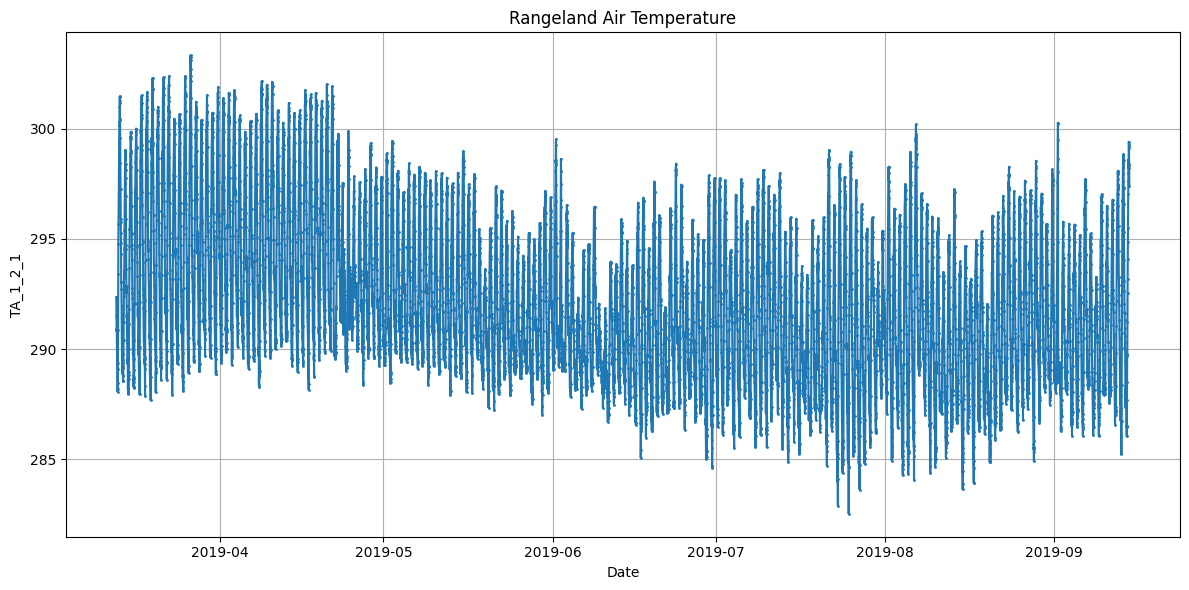

✅ Plotting 8601 rows for 'Rain'
   Range: 0.0 to 25.8


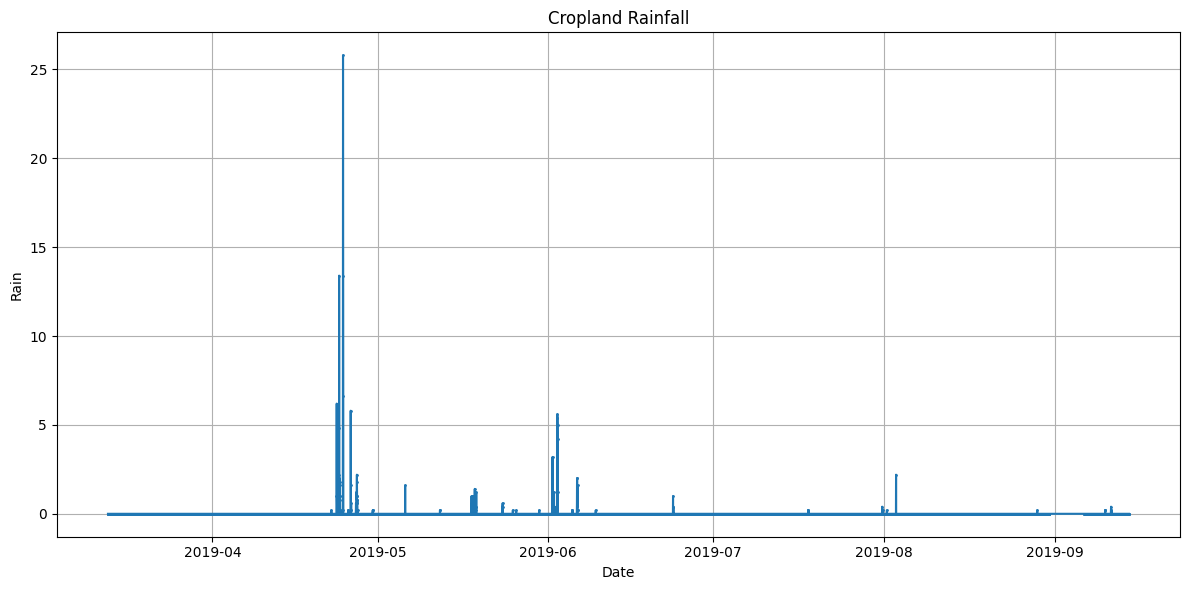

✅ Plotting 8164 rows for 'NEE'
   Range: -41.0 to 48.036


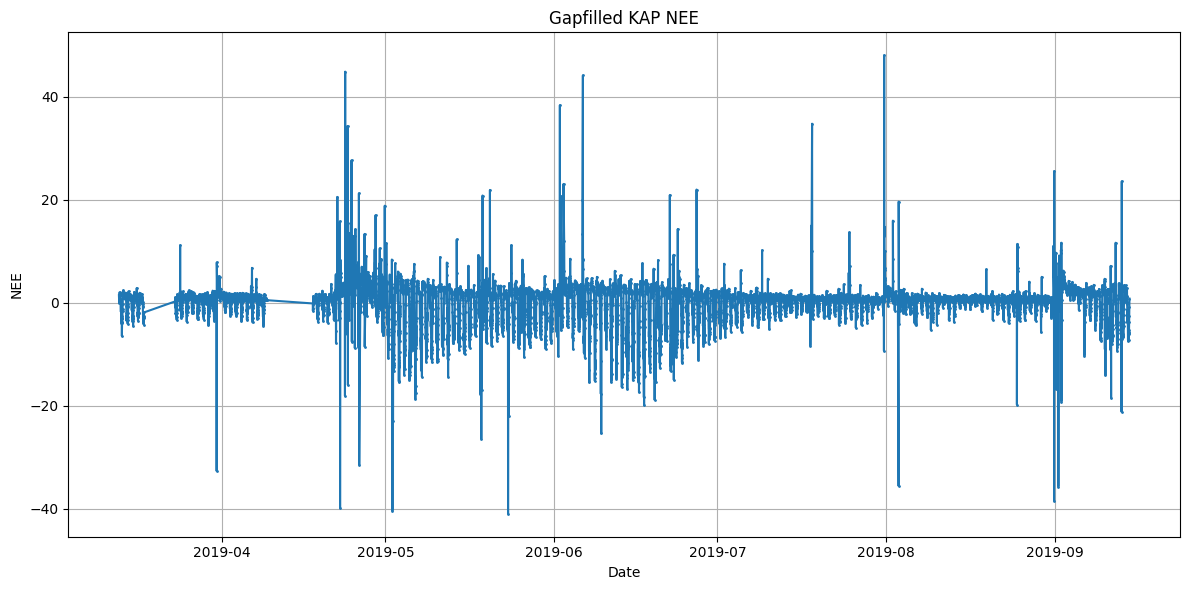

✅ Plotting 8451 rows for 'NEE'
   Range: -34.9 to 40.439


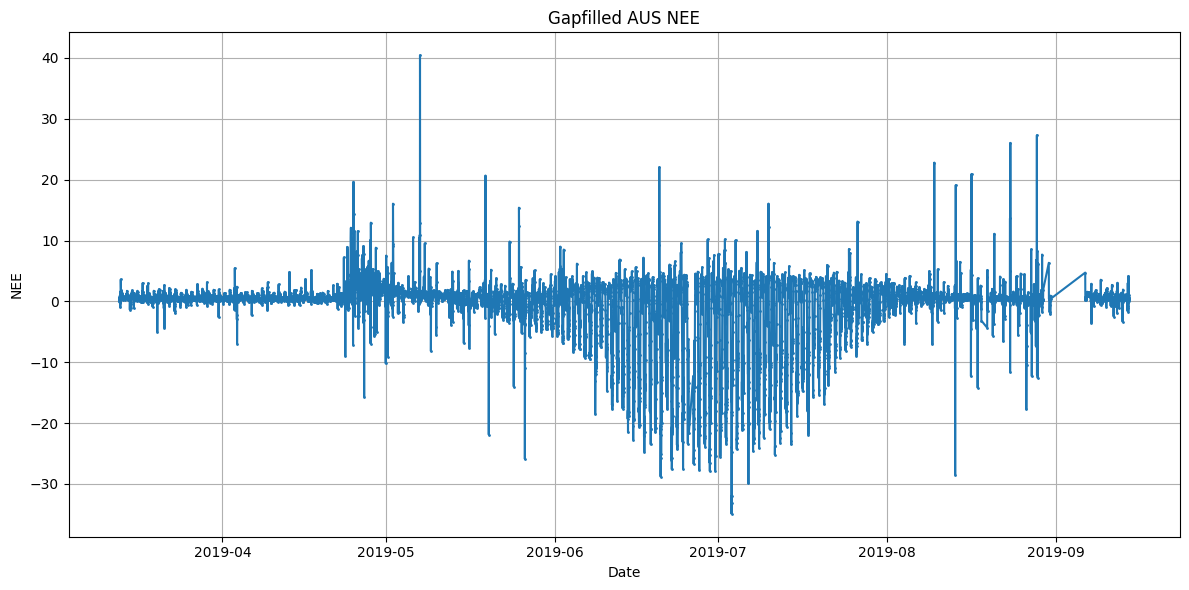

In [41]:
plot_variable(rangeland_data, 'DateTime', 'TA_1_2_1', title="Rangeland Air Temperature")
plot_variable(cropland_data, 'TIMESTAMP', 'Rain', title="Cropland Rainfall")
plot_variable(gapfill_kap_clean, 'Date Time', 'NEE', title="Gapfilled KAP NEE")
plot_variable(gapfill_aus_clean, 'Date Time', 'NEE', title="Gapfilled AUS NEE")


✅ Plotting 8164 rows for 'NEE'
   Range: -41.0 to 48.036


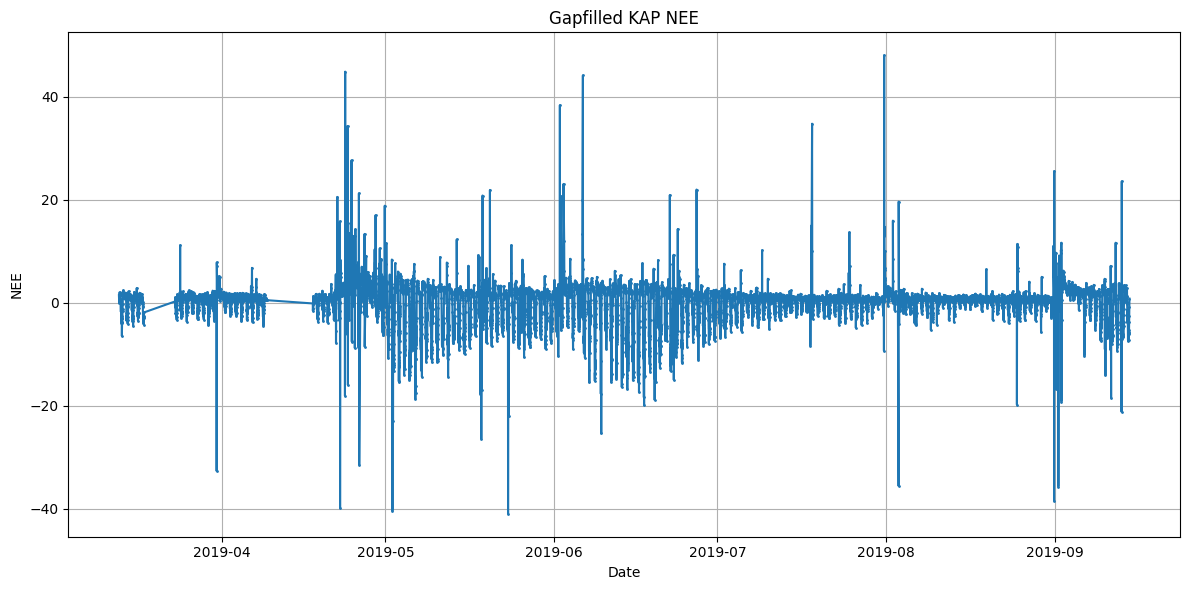

✅ Plotting 8916 rows for 'P_rain_1_1_1_mm'
   Range: 0.0 to 20.1


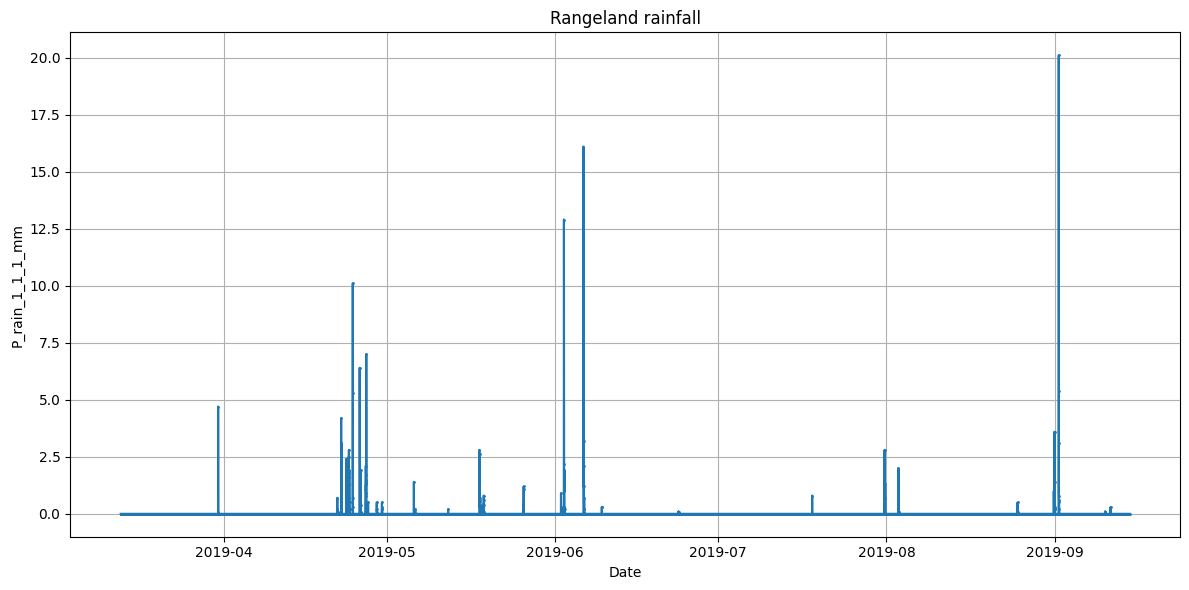

✅ Plotting 8451 rows for 'NEE'
   Range: -34.9 to 40.439


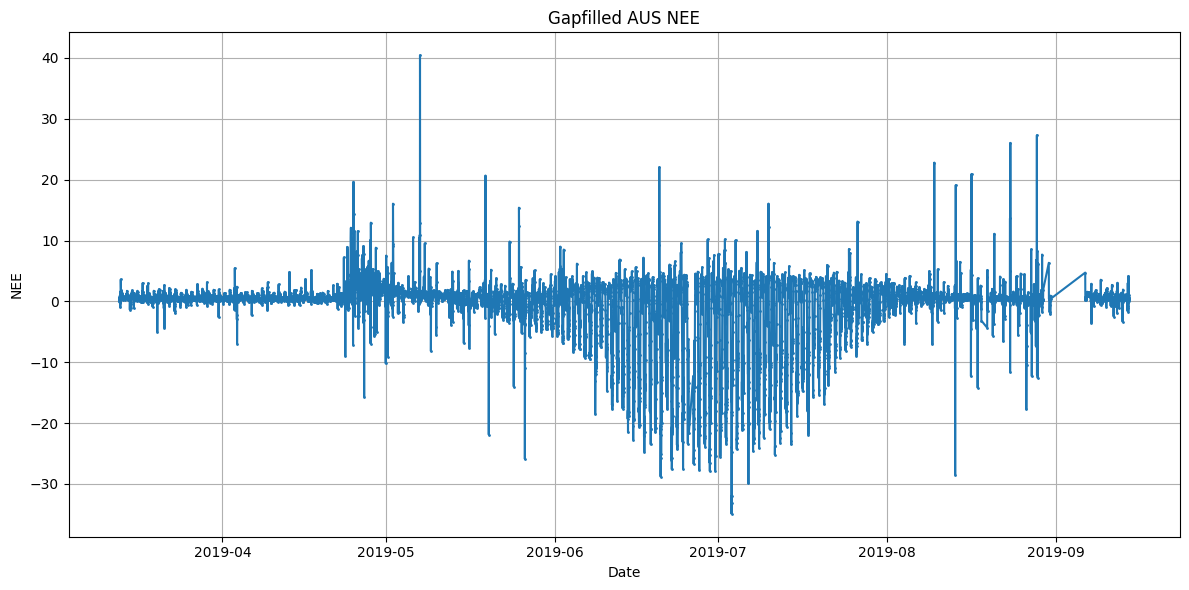

✅ Plotting 8601 rows for 'Rain'
   Range: 0.0 to 25.8


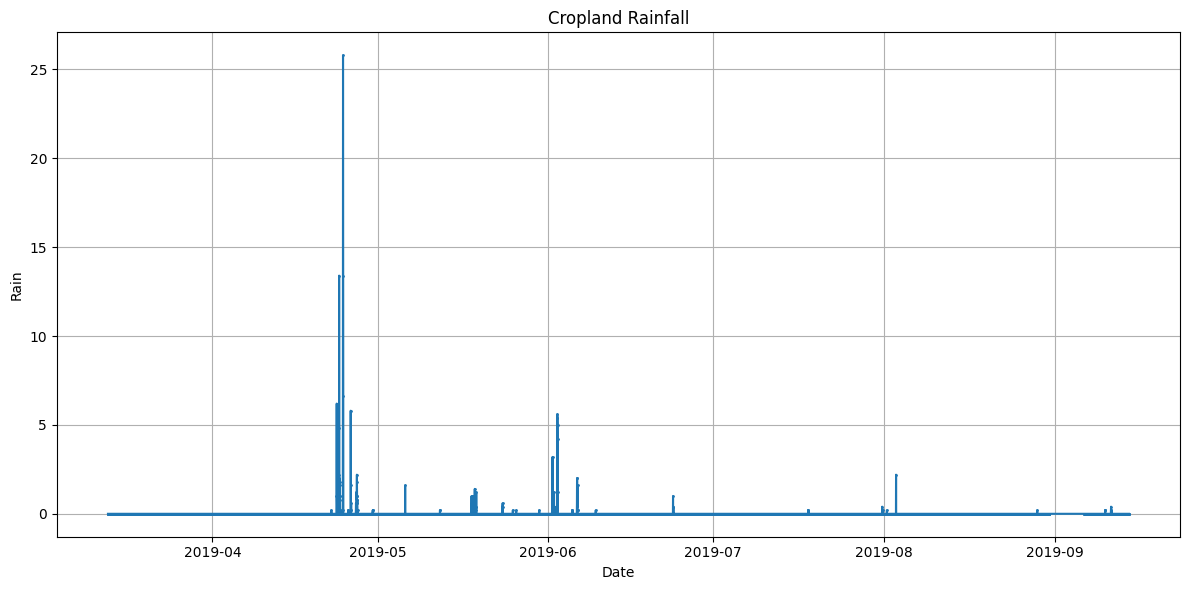

✅ Plotting 8916 rows for 'TA_1_2_1'
   Range: 282.521 to 303.335


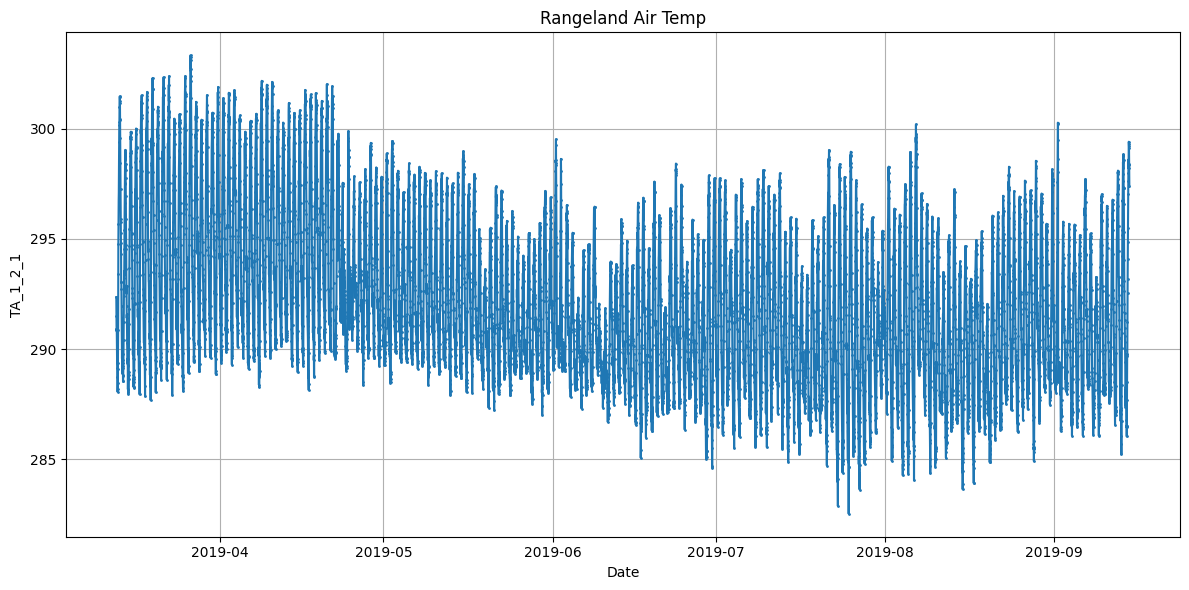

In [48]:
rangeland_data['P_rain_1_1_1_mm'] = rangeland_data['P_rain_1_1_1'] * 1000
plot_variable(gapfill_kap_clean, 'Date Time', 'NEE', title="Gapfilled KAP NEE")
plot_variable(rangeland_data, 'DateTime', 'P_rain_1_1_1_mm',title="Rangeland rainfall")
plot_variable(gapfill_aus_clean, 'Date Time', 'NEE', title="Gapfilled AUS NEE")
plot_variable(cropland_data, 'TIMESTAMP', 'Rain', title="Cropland Rainfall")
plot_variable(rangeland_data, 'DateTime', 'TA_1_2_1', title="Rangeland Air Temp")

